## 5. 데이터 전처리

In [1]:
house_df = pd.read_csv(
    "datas/주택도시보증공사_전국 평균 분양가격(2019년 9월).csv", encoding='euc-kr'
)
house_df.tail(2)

,지역명,규모구분,연도,월,분양가격(㎡)
4078,제주,전용면적 85㎡초과 102㎡이하,2019,9,NaN
4079,제주,전용면적 102㎡초과,2019,9,3601


In [2]:
house_df["분양가격(㎡)"] = house_df["분양가격(㎡)"].replace('', np.nan).replace('  ', np.nan).replace(
    ',', np.nan).replace('-', np.nan).str.replace(',', '')
house_df.dropna(inplace=True)
house_df["분양가격(㎡)"] = house_df["분양가격(㎡)"].astype(int)
house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3802 entries, 0 to 4079
Data columns (total 5 columns):
지역명        3802 non-null object
규모구분       3802 non-null object
연도         3802 non-null int64
월          3802 non-null int64
분양가격(㎡)    3802 non-null int64
dtypes: int64(3), object(2)
memory usage: 178.2+ KB


### 5.2 날짜형식 통일

#### house

In [3]:
# 연도, 월을 키값으로 다른 데이터 프레임들을 추가할 예정
# date 칼럼 생성
house_df["date"] = house_df["연도"]*100+house_df["월"]
house_df["date"] = house_df["date"].astype('str')
house_df = house_df[['date', '지역명', '규모구분', '분양가격(㎡)']]
house_df.reset_index(drop=True, inplace=True)
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3802 entries, 0 to 3801
Data columns (total 4 columns):
date       3802 non-null object
지역명        3802 non-null object
규모구분       3802 non-null object
분양가격(㎡)    3802 non-null int64
dtypes: int64(1), object(3)
memory usage: 118.9+ KB


#### cofix 

In [4]:
cofix = pd.read_csv(
    "datas/Cofix.csv", encoding='euc-kr', header=1)
cofix_df = cofix[cofix.columns[1:3]]
cofix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 2 columns):
대상월              58 non-null object
신규취급액기준 COFIX    58 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.0+ KB


In [5]:
# 날짜(대상월) 형식 맞추고 "date"로 칼럼명 변경
cofix_df['date'] = cofix_df['대상월'].str.replace("/", "")
cofix_df = cofix_df[['date', '신규취급액기준 COFIX']].copy()
cofix_df.reset_index(drop=True, inplace=True)
cofix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 2 columns):
date             58 non-null object
신규취급액기준 COFIX    58 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.0+ KB


#### cpi

In [6]:
# 2) 소비자물가지수
cpi_df = pd.read_csv(
    "datas/cpi.csv", encoding='euc-kr', header=0)
cpi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 8 columns):
기간          57 non-null float64
총지수         57 non-null float64
농축수산물       57 non-null float64
공업제품        57 non-null float64
전기·수도·가스    57 non-null float64
집세          57 non-null float64
공공서비스       57 non-null float64
개인서비스       57 non-null float64
dtypes: float64(8)
memory usage: 3.7 KB


In [7]:
# 날짜('date') 형식 맞추기
cpi_df = cpi_df[["기간", "총지수"]]
cpi_df["기간"] = (cpi_df["기간"]*100)  # 2015.1, 2016.1 로 되어있는 기간이 있어서 수정
cpi_df.columns = ["date", 'CPI총지수']  # 칼럼명 바꾸기
cpi_df['date'] = cpi_df['date'].astype('int')
cpi_df['date'] = cpi_df['date'].astype('str')
cpi_df.head()

,date,CPI총지수
0,201501,99.49
1,201502,99.56
2,201503,99.47
3,201504,99.63
4,201505,99.82


#### iaip 

In [8]:
iaip = pd.read_csv(
    "datas/iaip.csv", encoding='euc-kr', header=0)
iaip = iaip.T
iaip.columns = ["전산업생산지수(원지수)", "전월동기대비", "광공업", "건설업",
                "서비스업", "공공행정"]
iaip = iaip.drop(iaip.index[0])
iaip_df = pd.DataFrame(iaip["전산업생산지수(원지수)"]).reset_index()
iaip.head(2)

,전산업생산지수(원지수),전월동기대비,광공업,건설업,서비스업,공공행정
201501월,95.6,0.2,1.1,-0.4,1.6,-14.8
201502월,91,-0.1,-5.1,3.1,2.3,0.6


In [9]:
iaip.columns = ["전산업생산지수(원지수)", "전월동기대비", "광공업", "건설업",
                "서비스업", "공공행정"]  # 나중에 뭘 쓸지 몰라서 우선 모두 표시
iaip = iaip.drop(iaip.index[0])
iaip_df = pd.DataFrame(iaip["전산업생산지수(원지수)"]).reset_index()
iaip_df.head()

,index,전산업생산지수(원지수)
0,201502월,91
1,201503월,101.6
2,201504월,99.6
3,201505월,97.9
4,201506월,102.3


In [10]:
# 날짜(index) 형식 맞추기, 칼럼명 바꾸기
iaip_df['date'] = iaip_df['index'].str.replace("월", "")
iaip_df = iaip_df[['date', '전산업생산지수(원지수)']].copy()
iaip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 2 columns):
date            56 non-null object
전산업생산지수(원지수)    56 non-null object
dtypes: object(2)
memory usage: 1.0+ KB


#### googletrend

In [11]:
googletrend_df = pd.read_csv(
    "datas/googletrend.csv", encoding='utf-8')
googletrend_df.tail(2)

,date,google
246,2019-09-22,29
247,2019-09-29,39


In [12]:
# 날짜(index) 형식 맞추기
googletrend_df["date"] = googletrend_df["date"].apply(lambda x: x[:4]+x[5:7])
googletrend_df.head()

,date,google
0,201501,29
1,201501,29
2,201501,0
3,201501,87
4,201502,59


In [13]:
# 같은 date끼리 groupby 하기
googletrend_df = googletrend_df.groupby("date").agg("mean").reset_index()
googletrend_df.head()

,date,google
0,201501,36.25
1,201502,22.25
2,201503,29.40
3,201504,53.75
4,201505,25.40


In [14]:
# 추가 데이터는 모두 2015년 1월~2019년 9월까지의 연도-월별 데이터이다.
# 따라서 길이가 모두 같은것을 확인
len(house_df), len(cofix_df), len(cpi_df), len(iaip_df), len(googletrend_df)

(3802, 58, 57, 56, 57)

[목차로 돌아가기](#목차)

### 5.3 데이터 병합

In [15]:
datas = [cofix_df, cpi_df, iaip_df, googletrend_df]

for data in datas:
    house_df = pd.merge(house_df, data, how='inner')

In [17]:
house_df.head()

,date,지역명,규모구분,분양가격(㎡),신규취급액기준 COFIX,CPI총지수,전산업생산지수(원지수),google
0,201510,서울,전체,5841,1.57,100.33,102.5,17.25
1,201510,서울,전용면적 60㎡이하,5652,1.57,100.33,102.5,17.25
2,201510,서울,전용면적 60㎡초과 85㎡이하,5882,1.57,100.33,102.5,17.25
3,201510,서울,전용면적 85㎡초과 102㎡이하,5721,1.57,100.33,102.5,17.25
4,201510,서울,전용면적 102㎡초과,5879,1.57,100.33,102.5,17.25


[목차로 돌아가기](#목차)

## 6. 분석

### 6.1 변수간 관계확인

In [18]:
result_pv = house_df.pivot_table(
    "분양가격(㎡)", ["date"], ["지역명"], aggfunc=np.mean)
result_pv.index = result_pv.index.astype("str")
result_pv.tail(2)

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
date,,,,,,,,,,,,,,,,,
201908,2738.8,4798.8,3235.80,2731.6,3795.0,4369.8,3658.25,4179.2,9294.4,3573.5,NaN,4130.0,2497.6,2606.0,3789.5,2681.75,2346.4
201909,2809.8,4868.4,3369.75,2792.4,3795.0,4475.4,3730.50,4187.0,9312.4,3573.5,2732.0,4130.0,2563.4,2606.0,3789.5,2599.75,2391.6


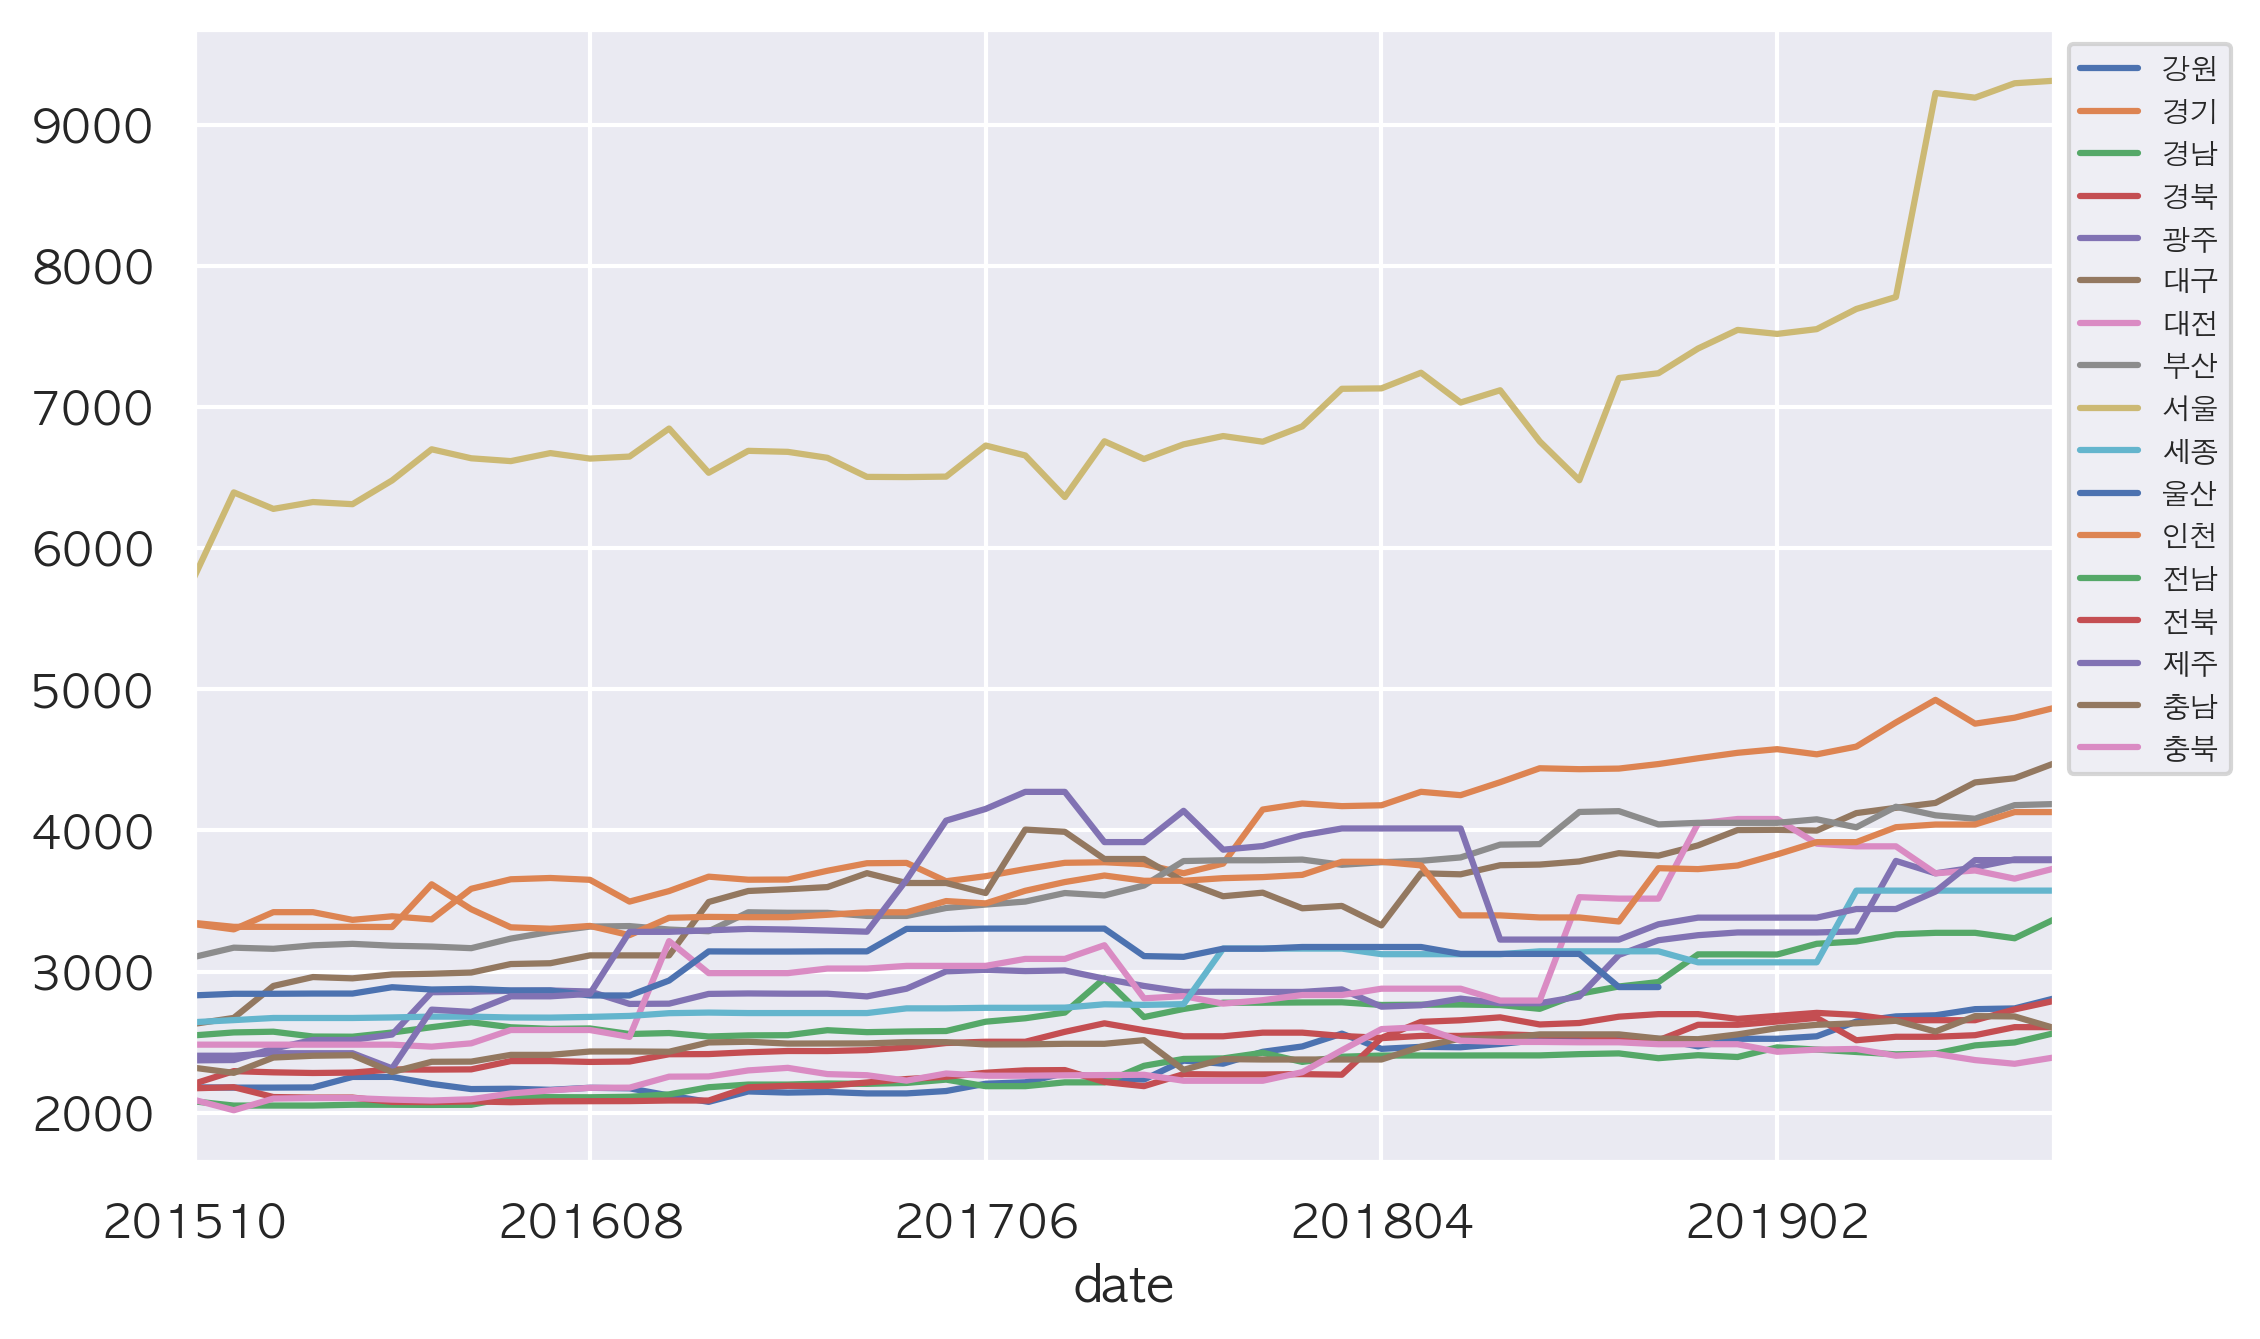

In [19]:
result_pv.plot()
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0), fontsize='x-small')
plt.show()

In [21]:
seoul = house_df[(house_df["규모구분"] == "전체") &
                     (house_df["지역명"] == "서울")]
seoul = seoul[["신규취급액기준 COFIX",
               "CPI총지수", "전산업생산지수(원지수)", "google", "분양가격(㎡)"]]
seoul["전산업생산지수(원지수)"] = seoul["전산업생산지수(원지수)"].astype('float64')
seoul["분양가격(㎡)"] = seoul["분양가격(㎡)"].astype('float64')
seoul = seoul.reset_index(drop=True)
seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
신규취급액기준 COFIX    48 non-null float64
CPI총지수           48 non-null float64
전산업생산지수(원지수)     48 non-null float64
google           48 non-null float64
분양가격(㎡)          48 non-null float64
dtypes: float64(5)
memory usage: 2.0 KB


In [61]:
seoulX = seoul.iloc[:,0:4]
seoulX = sm.add_constant(seoulX)
seouly = pd.DataFrame(seoul, columns=["분양가격(㎡)"])
model_partial = sm.OLS(seouly, seoulX)
result_partial = model_partial.fit()

In [62]:
scaler = StandardScaler()
A = sum((scaler.fit_transform(
            np.array(seoulX.iloc[:, 1]).reshape(-1, 1)).tolist()), [])

In [63]:
seoulX.head(2)

,const,신규취급액기준 COFIX,CPI총지수,전산업생산지수(원지수),google
0,1.0,1.57,100.33,102.5,17.25
1,1.0,1.66,100.18,101.6,31.60


##### 변수간 상관관계

In [24]:
seoul_corr = seoul.corr()

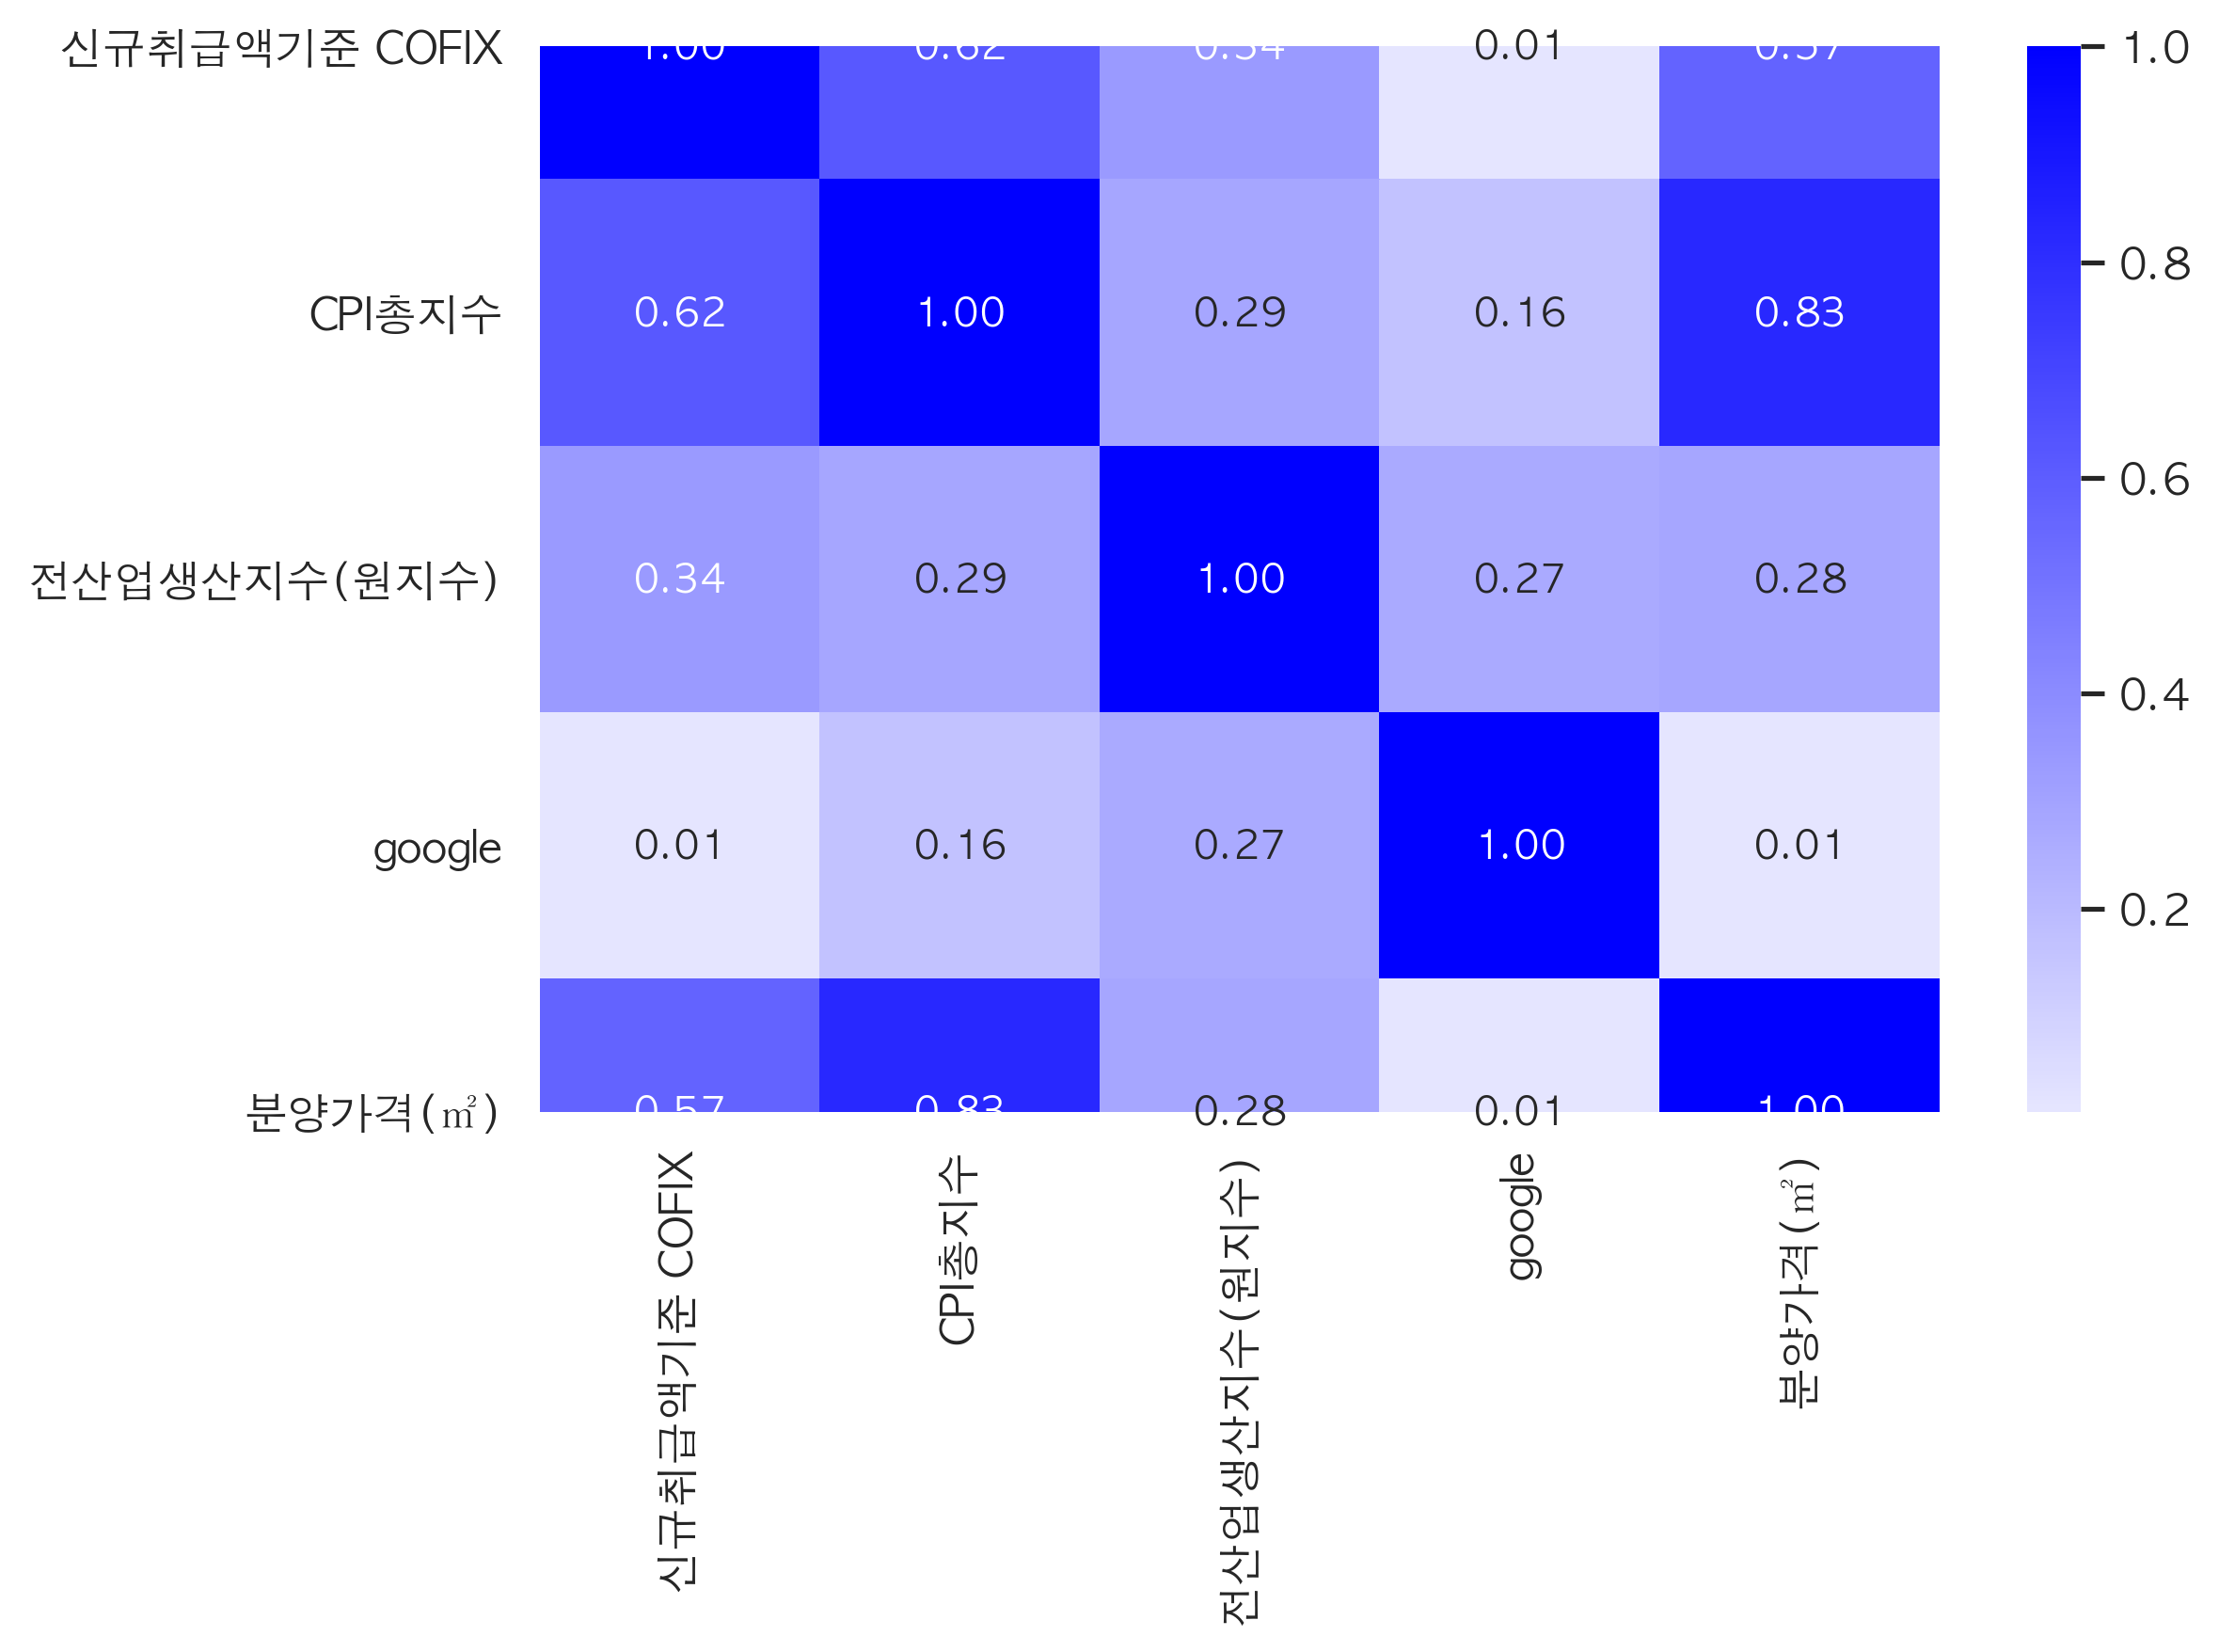

In [25]:
sns.heatmap(seoul_corr, cmap=sns.light_palette(
    "blue", as_cmap=True), annot=True, fmt=".2f")
plt.show()

##### 부분회귀 결과

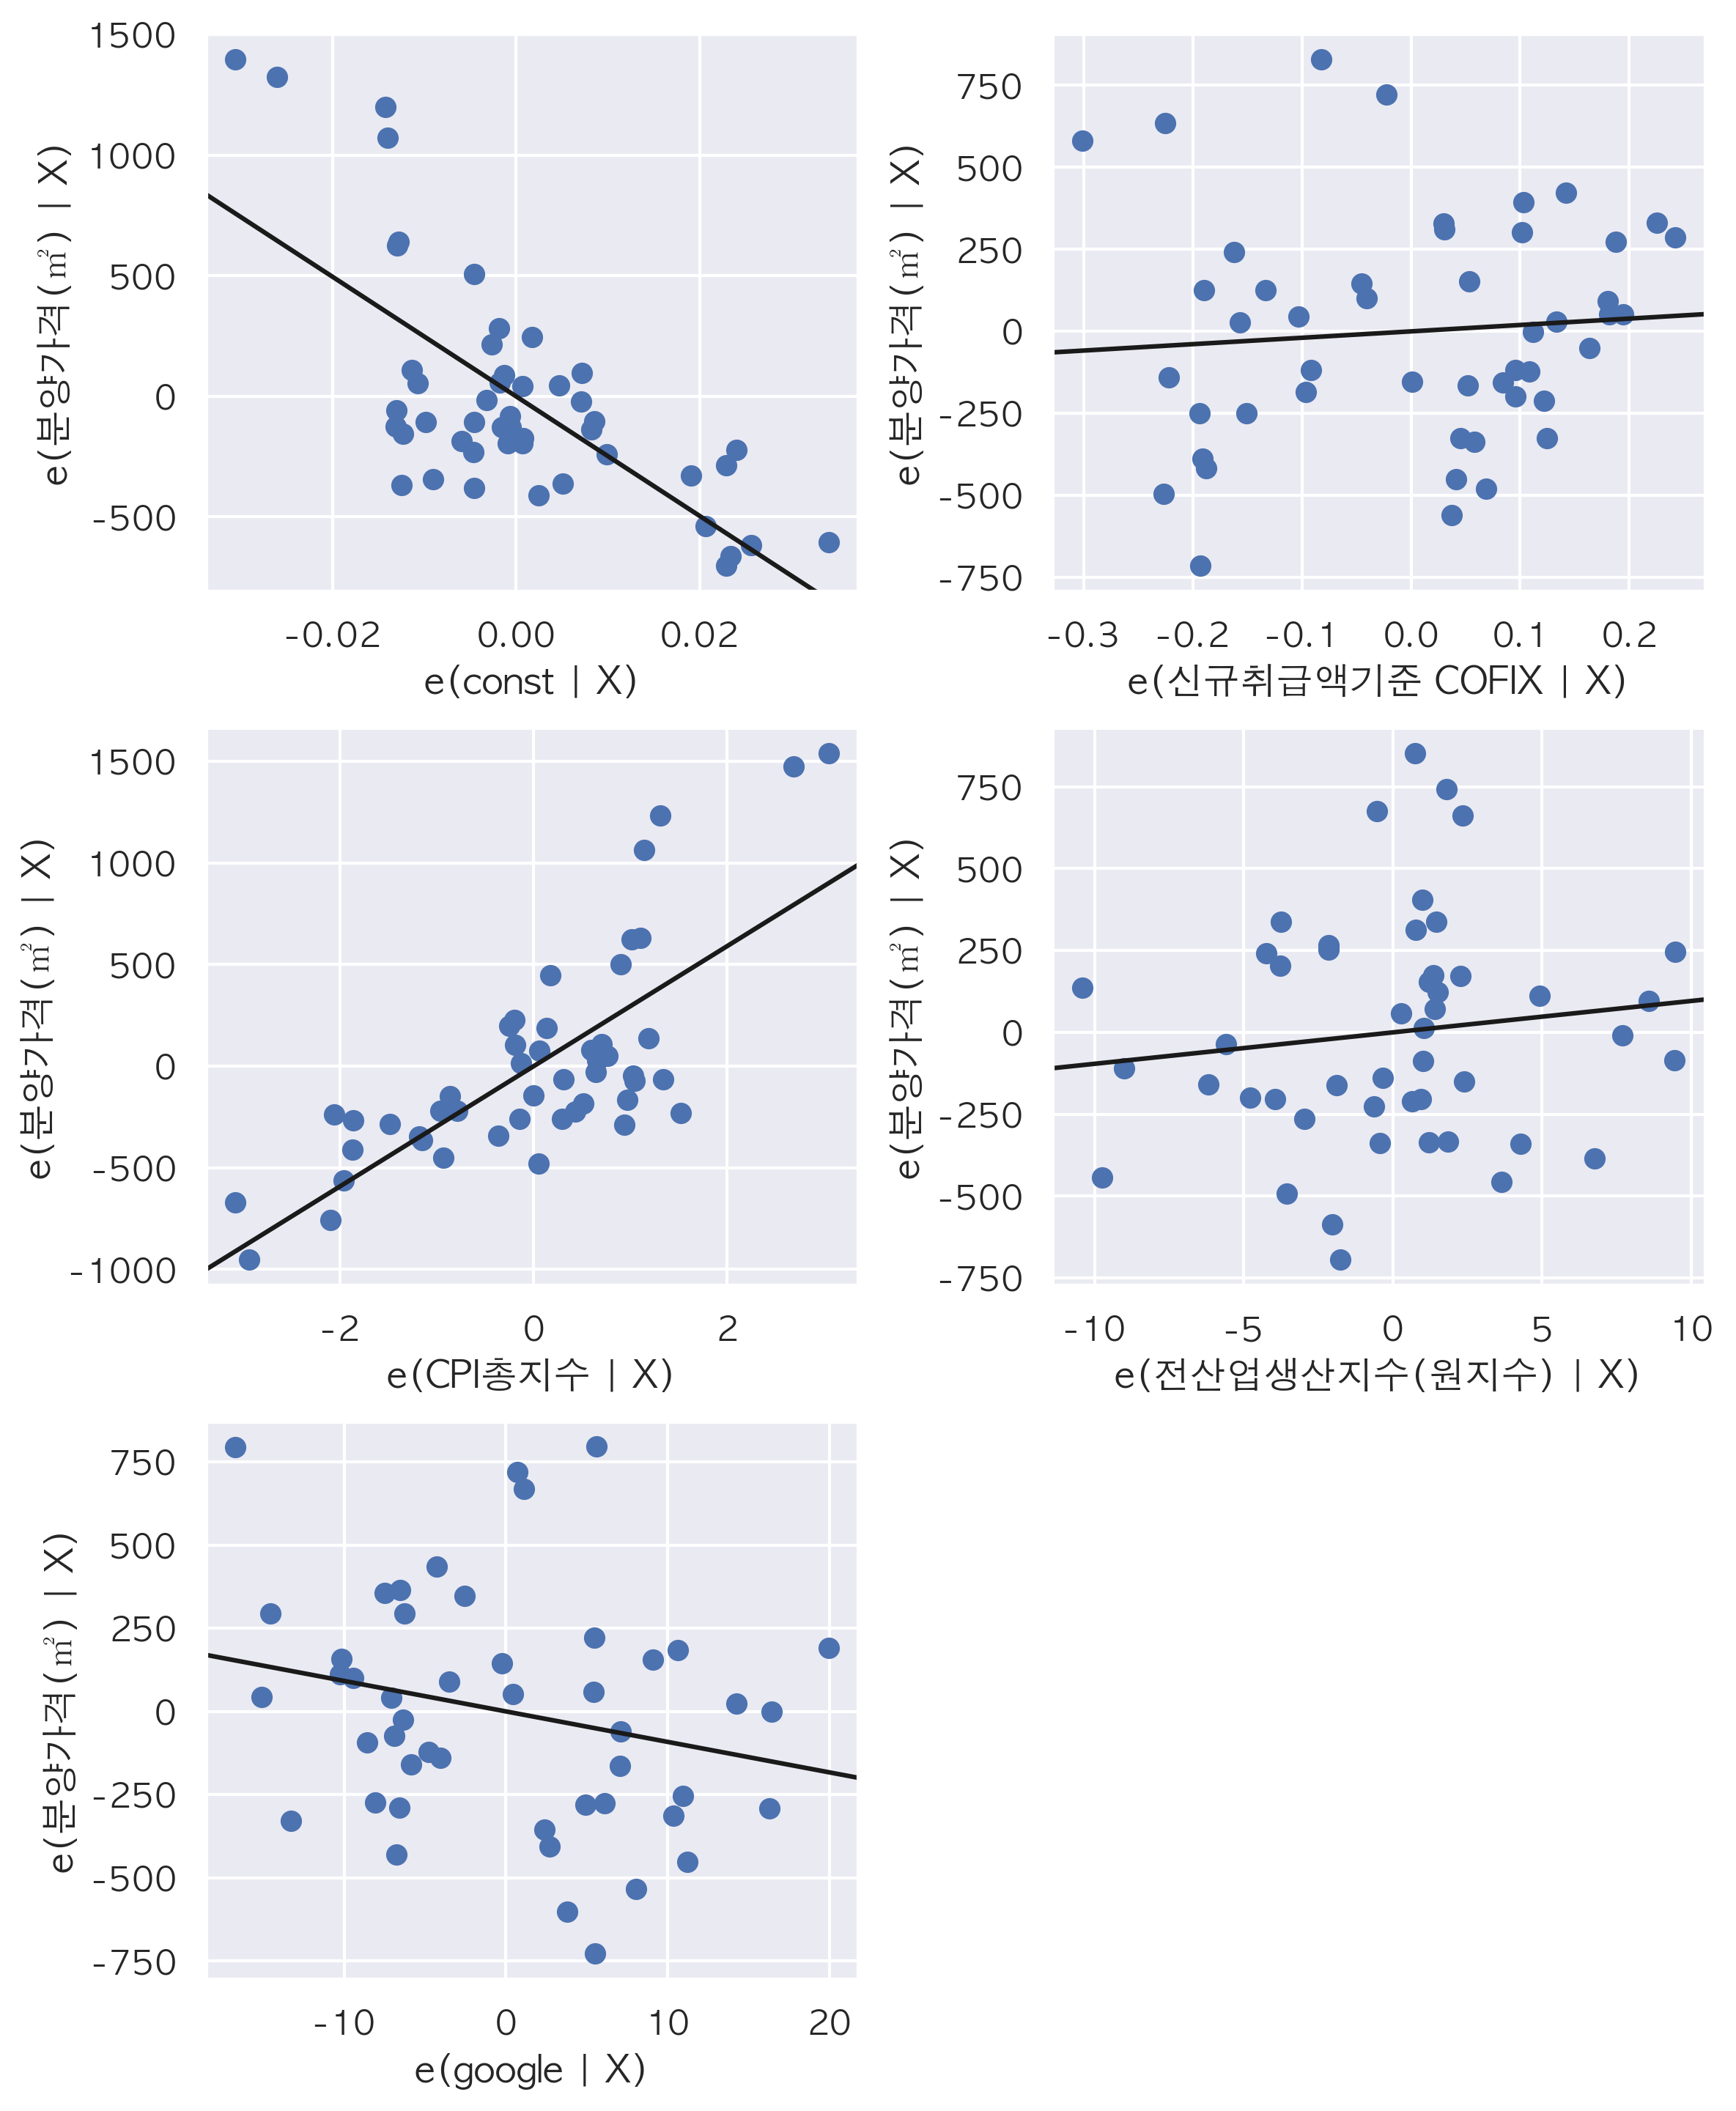

In [23]:
fig = plt.figure(figsize=(8, 10))
sm.graphics.plot_partregress_grid(result_partial, fig=fig)
fig.suptitle("")
plt.show()

### 6.2 선형회귀모형 및 성능평가

In [68]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [85]:
def linear_model(x, y):

    train_x, test_x, train_y, test_y = train_test_split(
        x, y, test_size=0.1, random_state=1)
    # 스케일링
    for n in range(1, 5):
        scaler = StandardScaler()
        A = sum((scaler.fit_transform(
            np.array(train_x.iloc[:, n]).reshape(-1, 1)).tolist()), [])
        train_x.iloc[:, n] = A
    
    model = LinearRegression(fit_intercept=True)
    # 모형 추정(상수항 결합을 자동으로 해줌)
    model = model.fit(train_x, train_y)
    model_sm = sm.OLS(train_y, train_x)
    result_sm = model_sm.fit()
    
    for num in range(1, 5):
        B = sum(
            (scaler.transform(np.array(test_x.iloc[:, num]).reshape(-1, 1)).tolist()), [])
        test_x.iloc[:, num] = B

    # test하는 독립변수값을 넣었을때 예측된 분양가격 데이터
    pred_y = model.predict(test_x)
    # Mean Absolute Error(MAE)
    mae = round(mean_absolute_error(test_y, pred_y), 2)
    # R-Square(결정계수): 회귀분석 모델의 적합도.
    # 0~1 값을 가지는데, 1에 가까울수록 적합도가 높다
    score = round(model.score(test_x, test_y), 2)

    return pred_y, mae, score, result_sm

In [93]:
a = linear_model(seoulX,seouly)
a

(array([[11187.55502922],
        [11026.76838967],
        [11253.75961529],
        [11255.5045449 ],
        [11025.42824962]]),
 4321.0,
 -68.82,
 <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x1c2865de90>)

In [96]:
print(a[3].summary())

                            OLS Regression Results                            
Dep. Variable:                분양가격(㎡)   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     22.97
Date:                Sun, 24 Nov 2019   Prob (F-statistic):           1.04e-09
Time:                        00:37:21   Log-Likelihood:                -312.45
No. Observations:                  43   AIC:                             634.9
Df Residuals:                      38   BIC:                             643.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6767.1163     56.182    120.450